<a href="https://colab.research.google.com/github/MACLab-hub/NativeC_NN/blob/master/CNN_get_weight/VGG_like.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
import sys
import pickle
from tensorflow import keras
from keras import datasets, layers, models

tf.__version__

'2.9.2'

In [ ]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# Coverting the images to gray image (32X32X1) from colored format (32X32X3)
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)

In [ ]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [ ]:
print(X_train_gray_norm.shape, X_test_gray_norm.shape)

(50000, 32, 32, 1) (10000, 32, 32, 1)


In [ ]:
VGG_like = models.Sequential()

# 128C3 - 128C3 - P2
VGG_like.add(layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', input_shape= (32,32,1)))
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('relu'))
VGG_like.add(layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
VGG_like.add(layers.MaxPool2D())
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('relu'))

# 256C3 - 256C3 - P2
VGG_like.add(layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('relu'))
VGG_like.add(layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
VGG_like.add(layers.MaxPool2D())
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('relu'))

# 512C3 - 512C3 - P2
VGG_like.add(layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal'))
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('relu'))
VGG_like.add(layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal'))
VGG_like.add(layers.MaxPool2D())
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('relu'))

# 1024FP - 1024FP - 10FP
VGG_like.add(layers.Flatten())
VGG_like.add(layers.Dense(1024, kernel_initializer='he_normal'))
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('relu'))
VGG_like.add(layers.Dense(1024, kernel_initializer='he_normal'))
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('relu'))
VGG_like.add(layers.Dense(10, kernel_initializer='he_normal'))
VGG_like.add(layers.BatchNormalization())
VGG_like.add(layers.Activation('softmax'))

VGG_like.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 128)      5

In [ ]:
VGG_like.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = VGG_like.fit(X_train_gray_norm, y_train, epochs=30, batch_size=200, verbose=1)

Epoch 1/30
250/250 [==============================] - 34s 111ms/step - loss: 1.1891 - accuracy: 0.6131
Epoch 2/30
250/250 [==============================] - 28s 112ms/step - loss: 0.7112 - accuracy: 0.7865
Epoch 3/30
250/250 [==============================] - 27s 109ms/step - loss: 0.4788 - accuracy: 0.8648
Epoch 4/30
250/250 [==============================] - 27s 109ms/step - loss: 0.2988 - accuracy: 0.9242
Epoch 5/30
250/250 [==============================] - 28s 110ms/step - loss: 0.1704 - accuracy: 0.9641
Epoch 6/30
250/250 [==============================] - 27s 110ms/step - loss: 0.1027 - accuracy: 0.9807
Epoch 7/30
250/250 [==============================] - 27s 109ms/step - loss: 0.0752 - accuracy: 0.9864
Epoch 8/30
250/250 [==============================] - 27s 110ms/step - loss: 0.0701 - accuracy: 0.9861
Epoch 9/30
250/250 [==============================] - 27s 110ms/step - loss: 0.0696 - accuracy: 0.9844
Epoch 10/30
250/250 [==============================] - 27s 110ms/step - l

In [ ]:
score = VGG_like.evaluate(X_test_gray_norm, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.7301 - accuracy: 0.8356


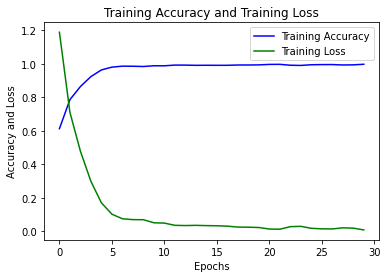

In [ ]:
accuracy = history.history['accuracy']
epochs = range(len(accuracy)) # we coudl have given the values directly as we alread know the the number of epochs while training the model
epochs
loss = history.history['loss']
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#VGG_like.save('./gdrive/MyDrive/VGG_like')
VGG_like = models.load_model('./gdrive/MyDrive/VGG_like')

In [ ]:
np.set_printoptions(precision=32, suppress=True, threshold=np.inf, linewidth=np.inf)
pd.options.display.float_format = '{:.12f}'.format

In [ ]:
weights = VGG_like.get_weights()

In [ ]:
# L W H C-IN C-OUT
for i in range(0, len(weights)):
  sys.stdout = open('./gdrive/MyDrive/VGG_like_weights/stdout' + str(i) + '.txt', 'w')
  for j in range(0, len(weights[i])):
    # conv2d
    if(i == 0 or i == 6 or i == 12 or i == 18 or i == 24 or i == 30):
      for k in range(0, len(weights[i][j])):
        for z in range(0,len(weights[i][j][k])):
          for x in range(0,len(weights[i][j][k][z])):
            print(str(weights[i][j][k][z][x]))
    # fc
    elif(i == 36 or i == 42 or i == 48):
      for k in range(0,len(weights[i][j])):
        print(weights[i][j][k])
    else:
      print(weights[i][j])

In [ ]:
print(len(weights))
print(len(weights[6]))          # width 또는 height
print(len(weights[6][0]))       # width 또는 height
print(len(weights[6][0][0]))    # C_in
print(len(weights[6][0][0][0])) # C_out

54
3
3
128
128
